## Free fall experiments

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def air_drag(aero_coefficient, front_surface, air_density, velocity):
    drag = (0.5 * aero_coefficient * front_surface * air_density * velocity**2) * (-np.sign(velocity))
    return(drag)

We can write the free fall model from the previous notebook as a function

In [3]:
def calculate_fall(height_0, v_y_0, mass, aero_coeff, front_surface):
    height = height_0
    v_y = v_y_0
    time = time_0
    time_log = [time_0]
    height_log = [height_0]
    v_y_log = [v_y_0]
    while height > 0:
        height = height + v_y * timestep
        force_gravity = g * mass
        force_drag = air_drag(aero_coeff, front_surface, air_density, v_y)
        force_total = force_gravity + force_drag
        acceleration = force_total / mass
        v_y = v_y + acceleration * timestep
        time = time + timestep
        time_log.append(time)
        height_log.append(height)
        v_y_log.append(v_y)
    return([time_log, height_log, v_y_log])

Parameters that will not change throughout our experiments

In [4]:
g = -9.81
v_y_0 = 0
time_0 = 0
air_density = 1.2
timestep = 0.001

#### Experiment 1: Effect of mass

In [5]:
masses = [1,2,5,10,20,50,100,200,500,1000]
height_0 = 2000
aero_coefficient = 0.8
front_surface = 0.01
results1 = []
for imass in masses:
    iresult = calculate_fall(height_0, v_y_0, imass, aero_coefficient, front_surface)
    results1.append(iresult)

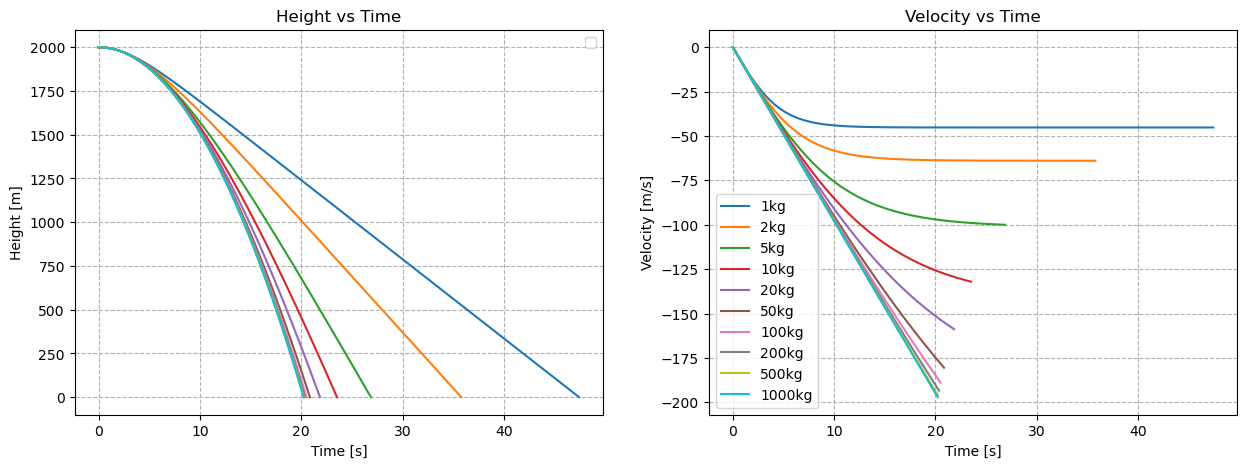

In [6]:
masses_names = [str(i) + 'kg' for i in masses]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].set_title('Height vs Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(linestyle='--')
ax[0].legend(masses_names)
ax[1].set_title('Velocity vs Time')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(linestyle='--')
for iresult in range(len(masses)):
    ax[0].plot(results1[iresult][0], results1[iresult][1])
    ax[1].plot(results1[iresult][0], results1[iresult][2])
ax[1].legend(masses_names)
plt.show()

#### Experiment 2: Effect of aero coefficient

In [7]:
aero_coeffs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.5, 2]
height_0 = 10000
mass = 1
front_surface = 0.01
results2 = []
for icoeff in aero_coeffs:
    iresult = calculate_fall(height_0, v_y_0, mass, icoeff, front_surface)
    results2.append(iresult)

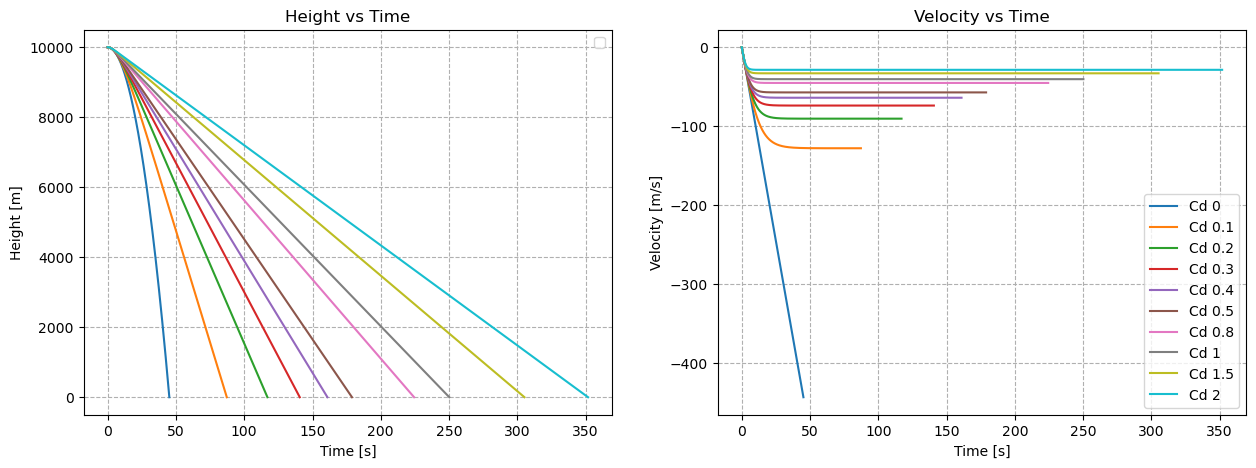

In [8]:
coeffs_names = ['Cd ' + str(i) for i in aero_coeffs]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].set_title('Height vs Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(linestyle='--')
ax[0].legend(coeffs_names)
ax[1].set_title('Velocity vs Time')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(linestyle='--')
for iresult in range(len(masses)):
    ax[0].plot(results2[iresult][0], results2[iresult][1])
    ax[1].plot(results2[iresult][0], results2[iresult][2])
ax[1].legend(coeffs_names)
plt.show()

#### Finding terminal velocity

In [9]:
terminal_velocities = []
for i in range(1,len(aero_coeffs)):
    this_velocity = results2[i][2][-1]
    terminal_velocities.append(this_velocity)

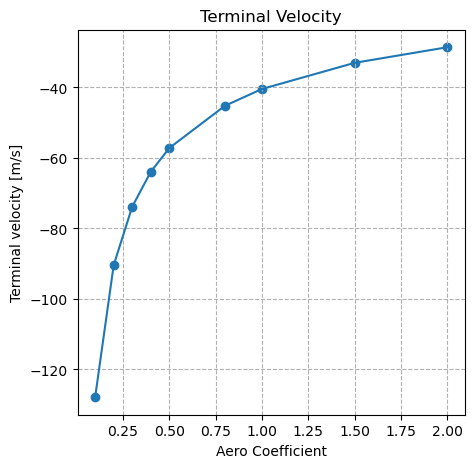

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.set_title('Terminal Velocity')
ax.set_xlabel('Aero Coefficient')
ax.set_ylabel('Terminal velocity [m/s]')
ax.grid(linestyle='--')
ax.scatter(aero_coeffs[1:], terminal_velocities)
ax.plot(aero_coeffs[1:], terminal_velocities)
plt.show()